# Early Diabetes Prediction

Dataset : https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification

## Import Here

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Beberapa tools seperti numpy, matplotlib, pandas, seaborn, scikitlearn,dst di import agar dapat digunakan pada proyek kali ini

## Data Loading

Disini digunakan file dari google drive, maka sambungkan terlebih dahulu colab dengan drive pribadi kita yang memiliki dataset didalamnya dalam bentuk zip.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Dikarenakan dalam bentuk zip, maka unzip terlebih dahulu dataset yang terletak difolder "Project_ML"

In [ ]:
!unzip gdrive/My\ Drive/Project_ML/Early_Diabetic_Prediction.zip

Kemudian membaca dataset dalam bentuk csv dengan pandas, dan memunculkan 5 baris teratas

In [23]:
data = pd.read_csv('diabetes_data.csv', delimiter=';')
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Pada dataset ini ditemukan 16 variabel dengan "class" sebagai apakah seseorang memiliki indikasi diabetes atau tidak. berikut variabel yang digunakan:
- age (Umur)
- gender (Jenis kelamin)
- polyuria (Buang air kecil secara berlebihan atau tidak)
- polydipsia (Haus secara berlebihan atau tidak)
- sudden_weight_loss (Kehilangan berat badan secara drastis)
- weakness (Kondisi tubuh terasa lemah atau tidak)
- polyphagia (Indikasi lapar secara berlebihan/ekstrim atau tidak)
- genital_thrush (Mengalami infeksi jamur pada kelamin)
- visual_blurring (Mengalami Pandangan Buram atau tidak)
- itching (Mengalami gatal-gatal)
- irritability (Sulit untuk mengontrol rasa marah)
- delayed_healing (Terdapat Indikasi luka yang susah untuk sembuh)
- partial_paresis (Mengalami otot yang lemas dibeberapa bagiam)
- muscle_stiffness (Ada atau tidaknya indikasi otot kaku)
- alopecia (Mengalami kerontokan rambut)
- obesity (Tergolong obesitas atau tidak, sesuai dengan BMI)
- class (mengalami diabetes atau tidak)

## Data Analysis

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

Semua variabel merupakan numerik kecuali pada jenis kelamin (gender) yang merupakan kategorikal

In [25]:
data.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dikarenakan data yang digunakan cukup bersih, maka tidak perlu memproses nilai yang hilang dan outliers.

Text(0.5, 1.0, 'Correlation Matrix')

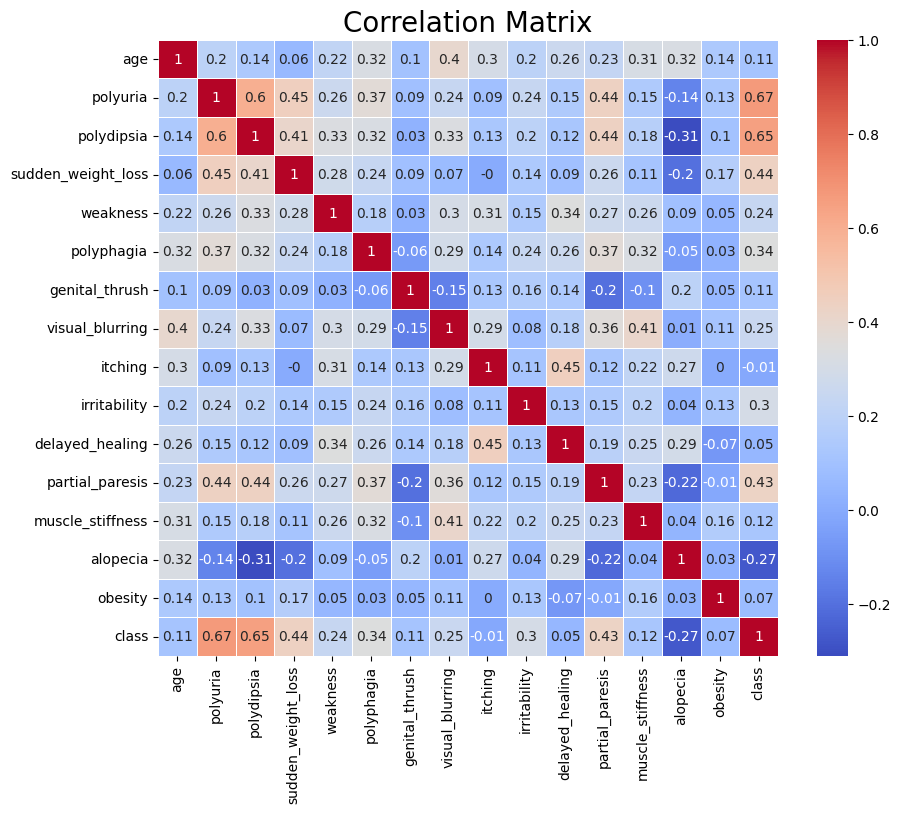

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Seperti yang dapat kita liat, di baris terakhir, variabel 'itching' memiliki korelasi yang rendah terhadap 'class' dengan nilai -0.01 diikuti oleh 'delayed_healing' dengan 0.05 dan 'obesity' 0.07.

Dan korelasi yang paling tinggi adalah 'polyuria' dan 'polydipsia' dengan nilai 0.67 dan 0.65.

        Sample  Gender percentage  Positive Diabetes  Diabetes Percentage
Male       328               63.1                147                 44.8
Female     192               36.9                173                 90.1


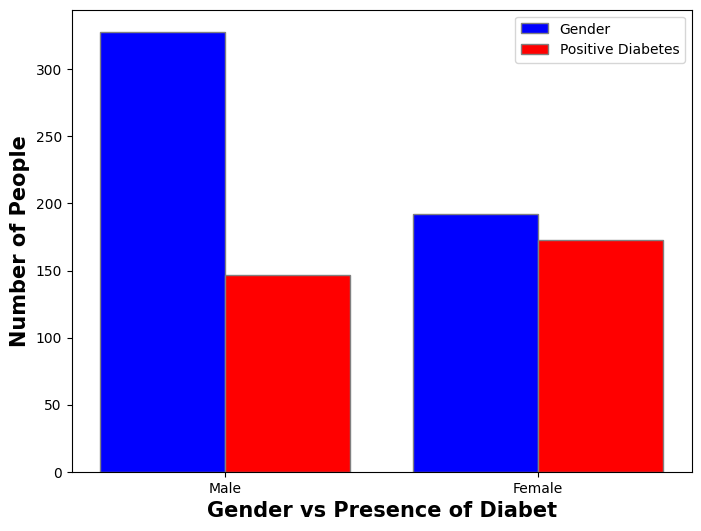

In [27]:
#count number of male/female
gen_count = data['gender'].value_counts() 
#count number of diabetic male/female
male_diabet = 0
female_diabet = 0
for i in range(len(data)):
  if data['gender'][i] == 'Male' and data['class'][i] == 1:
    male_diabet += 1
  elif data['gender'][i] == 'Female' and data['class'][i] == 1:
    female_diabet += 1
diabet_count = [male_diabet, female_diabet]
percent = 100*data['gender'].value_counts(normalize=True)
diabet_percent = [(100*male_diabet/gen_count[0]).round(1), 
                  (100*female_diabet/gen_count[1]).round(1)]
# Print Summary in Dataframe
df = pd.DataFrame({'Sample':gen_count, 'Gender percentage':percent.round(1), 
                   'Positive Diabetes':diabet_count, 
                   'Diabetes Percentage':diabet_percent})
print(df)

#Build the plot
barWidth = 0.4
fig = plt.subplots(figsize =(8, 6))

br1 = np.arange(len(gen_count))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, gen_count, color ='b', width = barWidth,
        edgecolor ='grey', label ='Gender')
plt.bar(br2, diabet_count, color ='r', width = barWidth,
        edgecolor ='grey', label ='Positive Diabetes')
 
plt.xlabel('Gender vs Presence of Diabet', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of People', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(gen_count))], ['Male', 'Female'])
plt.legend()
plt.show()

Karena hanya memiliki fitur numerik dalam matriks korelasi, saya ingin melihat bagaimana Gender vs Diabetes berjalan secara statistik. kita dapat melihat bahwa dalam dataset, 90,1% wanita menderita diabetes, ini mungkin tidak baik untuk model ini tetapi mari kita lihat bagaimana model ini nanti.

Juga, Anda dapat mencobanya dengan fitur yang berbeda seperti di bawah ini, tetapi ini tidak perlu karena kita sudah memiliki semua matriks korelasi untuk fitur numerik di atas

In [28]:
binary_feature = ['polyuria', 'polydipsia', 'sudden_weight_loss',
                  'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
                  'itching', 'irritability', 'delayed_healing', 
                  'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
count = []
for feature in binary_feature:
  count.append(data[feature].value_counts()[1])

dic = {}
for feature in binary_feature:
  dic["{}_diabet".format(feature)] = 0

for i in range(len(data)):
  for feature in binary_feature:
    if data[feature][i] == 1 and data['class'][i] == 1:
      dic['{}_diabet'.format(feature)] += 1

diabet_count=[]
for feature in binary_feature:
  diabet_count.append(dic['{}_diabet'.format(feature)])
non_diabet_count=[]
for i in range(len(binary_feature)):
  non_diabet_count.append(count[i]-diabet_count[i])

                    Positive  Percentage  Diabetes  D_Percent
polyuria                 258        49.6       243       94.2
polydipsia               233        44.8       225       96.6
sudden_weight_loss       217        41.7       188       86.6
weakness                 305        58.7       218       71.5
polyphagia               237        45.6       189       79.7
genital_thrush           116        22.3        83       71.6
visual_blurring          233        44.8       175       75.1
itching                  253        48.7       154       60.9
irritability             126        24.2       110       87.3
delayed_healing          239        46.0       153       64.0
partial_paresis          224        43.1       192       85.7
muscle_stiffness         195        37.5       135       69.2
alopecia                 179        34.4        78       43.6
obesity                   88        16.9        61       69.3


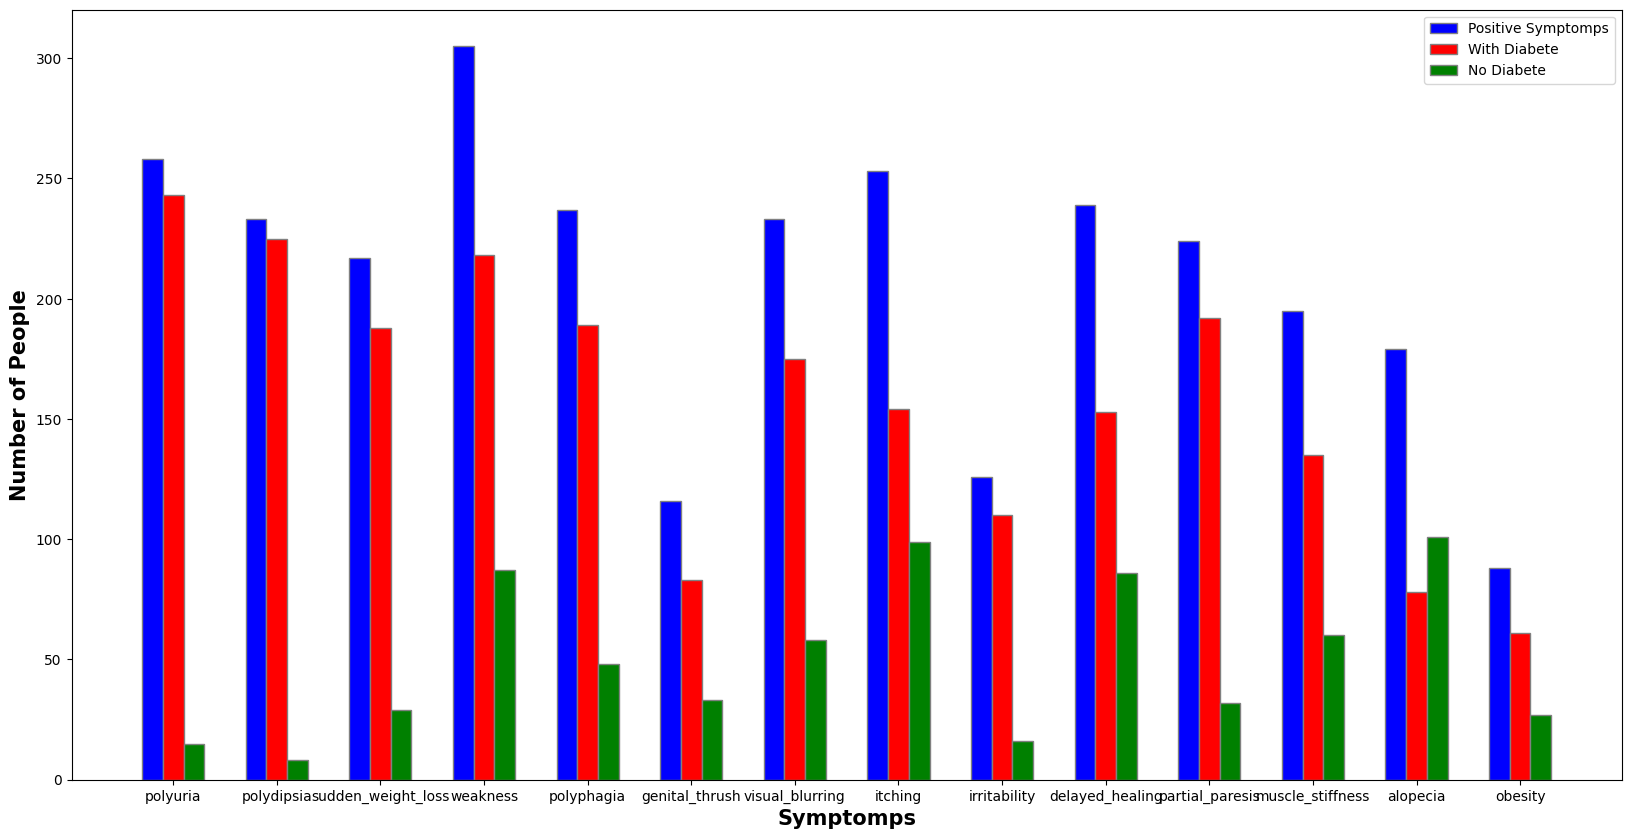

In [29]:
percent = []
diabet_percent = []
for i in range(len(count)):
  percent.append((100*count[i]/len(data)).round(1))
  diabet_percent.append((100*diabet_count[i]/count[i]).round(1))
  
# Print Summary in Dataframe
df = pd.DataFrame({'Positive':count, 'Percentage':percent, 
                   'Diabetes':diabet_count, 
                   'D_Percent':diabet_percent}, 
                  index=binary_feature)
print(df)

#Build the plot
barWidth = 0.2
fig = plt.subplots(figsize =(20, 10))

br1 = np.arange(len(count))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, count, color ='b', width = barWidth,
        edgecolor ='grey', label ='Positive Symptomps')
plt.bar(br2, diabet_count, color ='r', width = barWidth,
        edgecolor ='grey', label ='With Diabete')
plt.bar(br3, non_diabet_count, color ='g', width = barWidth,
        edgecolor ='grey', label ='No Diabete')
 
plt.xlabel('Symptomps', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of People', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(count))], 
           binary_feature)
plt.legend()
plt.show()

Seperti yang kita lihat di sini, kita mendapatkan bahwa sekitar 95% pasien di dataset positif Poliuria atau Polidipsia menderita diabetes, jadi, mereka mungkin memiliki korelasi seperti yang kita lihat pada matriks korelasi. Dan di bawah 65% pasien yang menderita Alopecia, Gatal dan Tertunda Penyembuhan memiliki diabetes.

## Data Preparation

### One Hot Encoding
Dikarenakan variabel gender adalah kategorikal, maka perlu dilakukan encoding.

In [30]:
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')],axis=1)
data.drop(['gender'], axis=1, inplace=True)
data.head()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,gender_Female,gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1


### Train-Test Split

Dataset dipecah menjadi train dan test dengan rasio 80:20. Hal ini juga harus mempertimbangkan ukuran dari dataset kita, jangan sampai test set kurang yang dapat menyebabkan hasil evaluasi tidak terlalu andal atau test set berlebihan yang tidak diperlukan.

In [31]:
X = data.drop(["class"],axis =1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 520
Total # of sample in train dataset: 416
Total # of sample in test dataset: 104


### Standarisation

Untuk variabel 'age' kita perlu melakukan standarisasi hingga nilai rata-rata sama dengan 0 dan standar deviasi sama dengan 1.

In [32]:
X_train.head()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,gender_Female,gender_Male
42,50,0,1,0,1,1,0,1,1,1,1,1,1,0,0,1,0
376,43,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1
184,48,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,0
41,50,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0
494,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
numerical_features = ['age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age
42,0.203401
376,-0.393078
184,0.032978
41,0.203401
494,-0.989557


In [39]:
print((50 - scaler.mean_)/scaler.scale_)

[0.20340095]


In [40]:
print(scaler.mean_)
print(scaler.scale_)

[47.61298077]
[11.7355363]


Nilai mean_(rata-rata) dan scale_(standar deviasi) akan digunakan nanti untuk diterapkan ketika deployment menggunakan metode yang sama yaitu standar scaler 

## Model Development

Setelah selesai mempersiapkan data kita dapat membuat model. Disini dicoba 6 jenis algoritma klasifikasi antara lain KNearestNeighbour, SVC, Decision Tree Classifier, Random Forest Classifier, dan Adaptive Boosting.

In [13]:
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['KNN', 'SVC', 'DecisionTree', 'RandomForest', 'Boosting'])

In [14]:
import pickle
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
filename = 'knn_model.pkl'
pickle.dump(knn, open(filename, 'wb'))
models.loc['train_acc','knn'] = accuracy_score(y_pred = knn.predict(X_train), y_true=y_train)

In [15]:
svc = SVC(kernel = 'poly' , random_state = 55)
svc.fit(X_train, y_train)
filename = 'svc_model.pkl'
pickle.dump(svc, open(filename, 'wb'))
models.loc['train_acc','SVC'] = accuracy_score(y_pred = svc.predict(X_train), y_true=y_train)

In [16]:
DT = DecisionTreeClassifier(criterion = 'entropy' ,random_state=55)
DT.fit(X_train, y_train)
filename = 'dt_model.pkl'
pickle.dump(DT, open(filename, 'wb'))
models.loc['train_acc','DecisionTree'] = accuracy_score(y_pred = DT.predict(X_train), y_true=y_train)

In [17]:
RF = RandomForestClassifier(n_estimators=150, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
filename = 'rf_model.pkl'
pickle.dump(RF, open(filename, 'wb'))
models.loc['train_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)

In [18]:
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
filename = 'adaboost_model.pkl'
pickle.dump(boosting, open(filename, 'wb'))
models.loc['train_acc','Boosting'] = accuracy_score(y_pred=boosting.predict(X_train), y_true=y_train)

## Model Evaluation

Untuk melihat performa model, kita melihat hasil evaluasi dengan metrik Akurasi, F1, Recall dan Precision untuk setiap train dan test set.

In [19]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
metrics = pd.DataFrame(columns=['train acc', 'test acc', 'train f1', 'test f1',
                                'train recall', 'test recall', 'train precision',
                                'test precision'], 
                   index=['KNN', 'SVC', 'DecisionTree', 'RandomForest', 'Boosting'])

model_dict = {'KNN': knn, 'SVC' : svc, 'DecisionTree': DT, 'RandomForest': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    metrics.loc[name, 'train acc'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))*100
    metrics.loc[name, 'test acc'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))*100
    metrics.loc[name, 'train f1'] = f1_score(y_true=y_train, y_pred=model.predict(X_train))
    metrics.loc[name, 'test f1'] = f1_score(y_true=y_test, y_pred=model.predict(X_test))
    metrics.loc[name, 'train recall'] = recall_score(y_true=y_train, y_pred=model.predict(X_train))
    metrics.loc[name, 'test recall'] = recall_score(y_true=y_test, y_pred=model.predict(X_test))
    metrics.loc[name, 'train precision'] = precision_score(y_true=y_train, y_pred=model.predict(X_train))
    metrics.loc[name, 'test precision'] = precision_score(y_true=y_test, y_pred=model.predict(X_test))

metrics

,train acc,test acc,train f1,test f1,train recall,test recall,train precision,test precision
KNN,89.903846,87.5,0.910256,0.894309,0.838583,0.833333,0.995327,0.964912
SVC,98.076923,93.269231,0.984,0.944,0.968504,0.893939,1.0,1.0
DecisionTree,100.0,94.230769,1.0,0.954545,1.0,0.954545,1.0,0.954545
RandomForest,100.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0
Boosting,86.057692,89.423077,0.881633,0.914729,0.850394,0.893939,0.915254,0.936508


Dataset ini memiliki data yang cukup seimbang (sekitar 60% adalah "1" untuk variabel kelas), maka akan bagus menggunakan skor F1 daripada ROC-AUC. Kami mendapatkan bahwa model terbaik pada train set dan test set adalah Random Forest Classification dengan 100% pada semua metrik evaluasi. Dan yang paling buruk adalah KNN dengan akurasi 86,5% pada test set, dan terlebih lagi hanya 81,8% pada recall dimana buruk jika kita menerapkannya ke penanganan pertama di kehidupan nyata. Selalu lebih baik di mana seseorang yang tidak diabetes diprediksi menderita diabetes dan mendapat pemeriksaan lanjutan daripada seseorang dengan diabetes yang diprediksi bukan diabetes dan tidak mendapat perawatan sampai penyakit menjadi lebih buruk.

In [21]:
prediction = X_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
for name, model in model_dict.items():
    print(prediction)
    print("----")
    pred_dict[name+'_pred'] = model.predict(prediction)
 
pd.DataFrame(pred_dict)

          age  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
264 -0.819134         1           1                   1         1           1   
327 -0.052233         0           0                   0         0           0   
289 -0.648712         0           0                   1         0           0   
172  1.055514         1           0                   0         0           0   
326  0.459035         0           0                   0         1           0   
472  2.078049         1           0                   0         0           1   
36   1.055514         1           0                   0         0           0   
5    0.629457         1           1                   0         1           1   
185  3.185796         1           1                   1         1           1   
389  0.459035         0           0                   0         1           0   
344  1.140725         1           0                   0         0           1   
138  0.288612         1     

,y_true,KNN_pred,SVC_pred,DecisionTree_pred,RandomForest_pred,Boosting_pred
264,1,1,1,1,1,1
327,0,0,0,0,0,0
289,0,0,0,0,0,0
172,1,1,1,1,1,1
326,0,0,0,0,0,0
472,0,0,0,0,0,1
36,1,1,1,1,1,1
5,1,0,1,1,1,1
185,1,1,1,1,1,1
389,0,0,0,0,0,0


Di atas adalah bukti dari 20 contoh hasil prediksi untuk masing-masing model. ditemukan bahwa pada data nomor 5, KNN memiliki prediksi yang salah, di mana y true adalah '1' dan prediksi KNN adalah '0'. Hal ini sangat berbahaya dalam dunia medis, penderita diabetes akan semakin parah jika tidak segera diobati.

## Using Deep Neural Network

Selain model klasifikasi yang tersedia di sklearn, kita juga dapat membangun model Neural Network kita sendiri menggunakan tensorflow. di sini saya menggunakan checkpoint untuk memastikan tensorflow menyimpan akurasi model terbaik saya di antara 500 epochs yang saya gunakan. Disini juga menggunakan 2 Dense layer dengan input_shape 17, saya menggunakan dropout layer untuk mencegah overfitting. Kemudian saya menggunakan adam optimizer dan binary crossentropy karena hasil outputnya adalah biner.

In [ ]:
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

model_nn = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=[17]),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(1, activation='sigmoid')
          ])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_nn.fit(X_train, y_train, 
                       epochs=500, callbacks=[model_checkpoint_callback])

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
model_nn.save('nn_model.h5')

Dapat dilihat dari grafik bahwa akurasi training semakin naik dan loss semakin turun tiap bertambahnya epochs, hal ini menunjukan performa yang baik dari sebuah model.

In [ ]:
model_nn.load_weights(checkpoint_filepath)
acc_train = model_nn.evaluate(X_train, y_train)

Evaluasi ulang model pada training set untuk memastikan checkpoint telah menyimpan model dengan performa akurasi terbaik.

In [ ]:
acc_test = model_nn.evaluate(X_test, y_test)

Kemudian saya mengevaluasi test set dan mendapatkan akurasi 97,12% dengan loss 0,0369. kinerjanya cukup baik dengan dataset kecil. 99,04% Akurasi pelatihan dan 97,12% Akurasi test set sedikit lebih baik daripada model Decision Tree, tetapi Random Forest Classifier Masih merupakan model terbaik untuk kasus ini.

Kemudian berikut merupakan total perbandingan antara penggunaan algoritma machine learning pada modul scikit learn dan penggunaan neural network. Penggunaan Random Forest masih menjadi prioritas karena performa yang dapat dikatakan sempurna.

In [ ]:
y_pred_train=np.round_(model_nn.predict(X_train))
y_pred_test=np.round_(model_nn.predict(X_test))

f1_train = f1_score(y_true=y_train, y_pred=y_pred_train)
f1_test = f1_score(y_true=y_test, y_pred=y_pred_test)
rec_train = recall_score(y_true=y_train, y_pred=y_pred_train)
rec_test = recall_score(y_true=y_test, y_pred=y_pred_test)
prec_train = precision_score(y_true=y_train, y_pred=y_pred_train)
prec_test = precision_score(y_true=y_test, y_pred=y_pred_test)

metrics_nn = pd.DataFrame({'train acc':acc_train[1]*100, 
                        'test acc':acc_test[1]*100, 
                        'train f1':f1_train, 
                        'test f1':f1_test, 
                        'train recall':rec_train, 
                        'test recall':rec_test,
                        'train precision':prec_train, 
                        'test precision':prec_test
                        },
                       index=['NeuralNetwork'])
metrics

In [ ]:
metrics_nn